# Artifacts Evaluation Instructions: #2405 Combining Structured Static Code Information and Dynamic Symbolic Traces for Software Vulnerability Prediction

## Preliminaries

This interactive Jupyter notebook provides a small-scale demo to showcase the program representation, vulnerability detection, and prediction of vulnerability detection discussed in the paper.

The main results of our ICSE 2024 paper involve comparing the performance of our vulnerability detection with prior machine learning-based approaches. The evaluation presented in our paper was conducted on a much larger dataset and for a longer duration. The intention of this notebook is to provide minimal working examples that can be evaluated within a reasonable time frame.

## Instructions for Experimental Workflow:

Before you start, please first make a copy of the notebook by going to the landing page. Then select the checkbox next to the notebook titled *AE.ipynb*, then click "**Duplicate**".

Click the name of the newly created Jupyter Notebook, e.g. **AE-Copy1.ipynb**. Next, select "**Kernel**" > "**Restart & Clear Output**". Then, repeatedly press the play button (the tooltip is "run cell, select below") to step through each cell of the notebook.

Alternatively, select each cell in turn and use "**Cell**"> "**Run Cell**" from the menu to run specific cells. Note that some cells depend on previous cells being executed. If any errors occur, ensure all previous cells have been executed.

## Important Notes

**Some cells can take more than half an hour to complete; please wait for the results until step to the next cell.** 

High load can lead to a long wait for results. This may occur if multiple reviewers are simultaneously trying to generate results. 

The experiments are customisable as the code provided in the Jupyter Notebook can be edited on the spot. Simply type your changes into the code blocks and re-run using **Cell > Run Cells** from the menu.

## Links to The Paper

Preprint of the paper can be found at: https://github.com/HuantWang/HuantWang.github.io/blob/main/ICSE_24.pdf

For each step, we note the section number of the submitted version where the relevant technique is described or data is presented.

The main results are presented in Figures 7-9 and Tables 3-5 from Sec 5.1 to Sec 5.3 of the submitted paper.

# Demo 1: The Concoction Model Architecture (Section 3)

This demo corresponds to the architecture of CONCOCTION given in Figure 3. Note that This is a small-scale demo for vulnerability detection.

## Step 1. Program representation

The program representation component maps the input source code and dynamic symbolic execution traces of the target function into a numerical embedding vector. 

### *Static representation model*

#### --program:
Input a program source code that you want to convert to vectors. Candidate parameters:

test_a.c, test_b.c, test_c.c. (You can also rewrite these files to define your own programs.)

In [1]:
import os
from demo import demo_run 
current = os.getcwd()  # Get the current working directory

''' Extract static information for programs (Sec. 3.2.1)'''
print("Showing the static information:")
print("---------------------------------------------------------------------------------------------------------")
# Use the path_static function from the demo_run module to obtain the program path (path) 
# and the script path (ScriptPath) for extracting static code information
path, ScriptPath = demo_run.path_static(current)
# Execute the script to extract static information, 
# passing the program path (path) and the script path (ScriptPath) as arguments
!bash $ScriptPath $path
print("---------------------------------------------------------------------------------------------------------\n")

''' Training the pretained representation model (Sec. 3.3.2)'''
print("Training phase:")
print("---------------------------------------------------------------------------------------------------------")
# Obtain the dataset path and the path to the script for training reoresentation model
dataset, scriptPath = demo_run.path_pretrain(current)
# Execute the script for pretraining
!python $scriptPath --dataset $dataset
print("---------------------------------------------------------------------------------------------------------\n")

''' Using trained model to represent programs''' 
print("Covert programs source code to vectors via trained model")
print("---------------------------------------------------------------------------------------------------------")
# Obtain the trained reoresentation model to embedding
scriptPath = demo_run.path_pretrain_show(current)
# Execute the script with a trained model to represent programs
#program you can choose with test_a.c,test_b.c or test_c.c
!python $scriptPath --program test_a.c

Showing the static information:
---------------------------------------------------------------------------------------------------------
Static information extracting...
Showing static information of program ok_png.c-ok_png_read_data.c.txt :
-----label-----
1
-----code-----
static bool ok_png_read_data(ok_png_decoder *decoder, uint32_t bytes_remaining) {
    ok_png *png = decoder->png;
    size_t inflate_buffer_size = 64 * 1024;
    size_t num_passes = decoder->interlace_method == 0 ? 1 : 7;
    uint8_t bits_per_pixel = decoder->bit_depth * OK_PNG_SAMPLES_PER_PIXEL[decoder->color_type];
    uint8_t bytes_per_pixel = (bits_per_pixel + 7) / 8;
    uint64_t max_bytes_per_scanline = 1 + ((uint64_t)png->width * bits_per_pixel + 7) / 8;
    size_t platform_max_bytes_per_scanline = (size_t)max_bytes_per_scanline;

    // Create buffers
    if (!png->data) {
        if (decoder->allocator.image_alloc) {
            decoder->allocator.image_alloc(decoder->allocator_user_data,
                 


### *Dynamic representation model*


In [2]:
import os
from demo import demo_run 
current = os.getcwd()  # Get the current working directory
''' Extract dynamic information for programs (Sec. 3.2.2)'''
print("Showing the dynamic information:")
print("---------------------------------------------------------------------------------------------------------")
# Use the path_static function from the demo_run module to obtain the project path (path) 
# and the script path (ScriptPath) for extracting dynamic code information
path, ScriptPath = demo_run.path_dynamic(current)
# Execute the script to extract dynamic information, 
# passing the program path (path) and the script path (ScriptPath) as arguments
!bash $ScriptPath $path 
print("\n---------------------------------------------------------------------------------------------------------\n")

''' Training the dynamic pretained representation model (Sec. 3.3.2)'''
print("Training phase:")
print("---------------------------------------------------------------------------------------------------------")
# Obtain the dataset path and the path to the script for training reoresentation model
dataset, scriptPath = demo_run.path_pretrain_dynamic(current)
# Execute the script for pretraining dynamic representation model
!python $scriptPath  --dataset $dataset
print("---------------------------------------------------------------------------------------------------------\n")

''' Using trained model to represent programs dynamic information''' 
print("Covert programs source code to vectors via trained model")
print("---------------------------------------------------------------------------------------------------------")
# Execute the script with a trained model to represent programs dynamic information
scriptPath = demo_run.path_pretrain_dynamic_show(current)
#program you can choose with test_a.c,test_b.c or test_c.c
!python $scriptPath --program test_a.c

Showing the dynamic information:
---------------------------------------------------------------------------------------------------------
Compiling the entire project...
Using KLEE to collect the dynamic information...
Showing the dynamic code information of 4sqlite3.c-sqlite3VXPrintf.c.txt :
----------------dynamic----------------
=======testcase========
model_version:0x01000000
stdin-stat:0x000800000000000001000000ffffffff0100000000000000a4810000e8030000e8030000ffffffff0000000000000000ffffffffffffffff0010000000000000ffffffffffffffff2ff9366400000000ffffffffffffffff9ff8366400000000ffffffffffffffff9ff8366400000000ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
stdin:0x4700000000000000000000000000000000000000
=========trace=========
void sqlite3VXPrintf(   StrAccum *pAccum,                  /* Accumulate results here */   int useExtended,                   /* Allow extended _-conversions */   const char *fmt,                   /* Format string */   va_list ap           



## Step 2. Training Vulnerability Detection Model

 Concoction’s detection component takes the joint embedding as input to predict the presence of vulnerabilities.  Our current implementation only identifies whether a function may contain a vulnerability or bug and does not specify the type of vulnerability. Here we use CVE benchmarks to show the process.

**approximate runtime ~ 10 minutes (please wait before moving to the next cell)**

## Step 3. Deployment

This demo shows how to deploy our trained model on a real world project. Here we apply Concoction to the project Jasper.

#### *Path Selection for Symbolic Execution*:
After training the end-to-end model, we develop a path selection component to automatically select a subset of important paths whose dynamic traces are likely to improve prediction accuracy during deployment.

*approximate runtime ~ 10 minutes*

In [3]:
import os
from demo import demo_run 
current = os.getcwd()  # Get the current working directory
''' Training vulnerability detection model (Sec. 3.3.3)'''
print("Training detection model:")
print("---------------------------------------------------------------------------------------------------------")
# Use the path_train function from the demo_run module to obtain the project path (path) 
# and the script path (ScriptPath) for training the detection model
train_dataset, ScriptPath = demo_run.path_train(current)
# Execute the script to train the detection model
!python $ScriptPath  --dataset $train_dataset --epochs 200 --batch_size 64
print("---------------------------------------------------------------------------------------------------------\n")


''' Testing vulnerability detection model'''
print("Testing detection model:")
print("---------------------------------------------------------------------------------------------------------")
# Use the path_test function from the demo_run module to obtain the test project path (path) 
# and the script path (ScriptPath) for testing the detection model
test_dataset, model_to_load,ScriptPath = demo_run.path_test(current)
# Execute the script to test the detection model
!python $ScriptPath  --dataset $test_dataset --model_to_load $model_to_load
print("---------------------------------------------------------------------------------------------------------\n")


Training detection model:
---------------------------------------------------------------------------------------------------------
Training the detection Model...
Loading training and validation data set...
Training the detection model...
Training finished and saving the best trained model, The best validation performance is :
f1 = 0.8873, precision = 0.9242, recall = 0.8531, accuracy = 0.8893

---------------------------------------------------------------------------------------------------------

Testing detection model:
---------------------------------------------------------------------------------------------------------
Show the Trained Model (Load trained model and test on test case)
Loading test dataset and the trained model...
The test performance is :
f1 = 0.8715, precision = 0.8914,recall = 0.8525,accuracy = 0.8686

---------------------------------------------------------------------------------------------------------



In [4]:
import os
from Evaluation.demo1.concoction import Concoction
from demo import demo_run 
current = os.getcwd()
concoction=Concoction()

''' Path collection (Sec. 3.4) '''
print("Collecting execution paths:")
print("---------------------------------------------------------------------------------------------------------")
concoction.extractPathRepre()
print("---------------------------------------------------------------------------------------------------------\n")


''' Active learning for path selection'''
print("Path selection:")
print("---------------------------------------------------------------------------------------------------------")
concoction.pathSelect()
print("---------------------------------------------------------------------------------------------------------\n")


''' Vulnerability detection'''
print("Vulnerability detection:")
print("---------------------------------------------------------------------------------------------------------")
concoction.symbolicOnPath()
test_dataset, model_to_load,ScriptPath = demo_run.detect(current)
!python $ScriptPath  --dataset $test_dataset --model_to_load $model_to_load
print("---------------------------------------------------------------------------------------------------------\n")

---------------------------------------------------------------------------------------------------------

file (jas_cm.c-jas_cmprof_createfromiccprof.c.txt)  42 paths detected.

---------------------------------------------------------------------------------------------------------

Path selection:
---------------------------------------------------------------------------------------------------------
Active learning for path selection...

Apply active learning to jas_cm.c-jas_cmprof_createfromiccprof.c.txt...
5 paths selected.

---------------------------------------------------------------------------------------------------------

Vulnerability detection:
---------------------------------------------------------------------------------------------------------

Detecting vulnerability for files in project jasper...
The following files are predicted to vulnerability:
['jas_cm.c-jas_cmshapmatlut_set.c', 'jas_cm.c-jas_cmshapmatlut_init.c', 'jas_malloc.c-jas_malloc.c']

--------------

## Demo 2: Experimental Evaluation (Section 5)

Here, we present the evaluation results from our submitted manuscript. The entire training process, which takes over a day to complete, is available through our Docker image. Detailed instructions can be found on our project's GitHub. 


### Detect Vulnerabilities in Large-scale Testing (Section 5.1)

This part(https://github.com/HuantWang/CONCOCTION/tree/main/vul_info) gives a quantified summary of Concoction for detecting function-level code vulnerabilities across the 20 projects listed in Table 3 in our papaer. This demo corresponds to Table 3 of the submitted manuscript.

### Comparison on Open Datasets (Section  5.2)

We now evaluate our vulnerability detection model on the SARD and CVE datasets in Table 1 in the paper.

This demo corresponds to Figure 7 and 8 of the submitted manuscript.

*approximate runtime = 10 minutes for one benchmark*

#### --dataset:
This parameter defines 8 candidate vulnerability dataset type. Possible values are:

Standard vulnerability dataset (Sard dataset) : "CWE-416", "CWE-789","CWE-122","CWE-124","CWE-126","CWE-190","CWE-191","CWE-78"

Open source vulnerability dataset : "Github"

#### --method:
This parameter defines 12 candidate vulnerability detection methods. Possible values are:

"concoction" ,"funded"[1], "vuldeepecker"[2], "reveal"[3], "devign"[4], "ReGVD"[5], "LineVul"[6], "Linevd"[7], "codebert"[8], "GraphCodebert"[9], "ContraFlow"[10],"Liger" [11] 

### *Sard Dataset*


In [5]:
%matplotlib inline
from Evaluation.demo2.demo2 import *

''' Detection on SARD dataset '''

print("Evaluating the \"CONCOCTION\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="concoction").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"funded\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="funded").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"devign\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="devign").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"reveal\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="reveal").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"vuldeepecker\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="vuldeepecker").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"ContraFlow\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="ContraFlow").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"Liger\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="Liger").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"codebert\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="codebert").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"GraphCodebert\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="graphcodebert").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"ReGVD\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="regvd").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"LineVul\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="LineVul").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"Linevd\" approach on SARD open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationSard(dataset="CWE-416",method="Linevd").run()
print("---------------------------------------------------------------------------------------------------------\n")
print("Finish")

Evaluating the "CONCOCTION" approach on SARD open source vulnerability:
---------------------------------------------------------------------------------------------------------
Loading the dataset... 
Loading the trained model...

The detection result is: Accuracy: 0.9592 Precision: 0.9310 Recall: 1.0000 F1 Score: 0.9643
---------------------------------------------------------------------------------------------------------

Evaluating the "funded" approach on SARD open source vulnerability:
---------------------------------------------------------------------------------------------------------
Loading the dataset... 
Loading the trained model...

The detection result is : Accuracy: 0.722  Precision: 0.667  Recall: 0.889  F1 Score: 0.762
---------------------------------------------------------------------------------------------------------

Evaluating the "devign" approach on SARD open source vulnerability:
--------------------------------------------------------------------------

### *Github Dataset*:


In [6]:
from Evaluation.demo2.demo2 import *
''' Detection on Github dataset '''
print("Evaluating the \"concoction\" approach on GitHub open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationGithub(dataset="Github",method="concoction").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"funded\" approach on GitHub open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationGithub(dataset="Github",method="funded").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"devign\" approach on GitHub open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationGithub(dataset="Github",method="devign").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"reveal\" approach on GitHub open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationGithub(dataset="Github",method="reveal").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"vuldeepecker\" approach on GitHub open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationGithub(dataset="Github",method="vuldeepecker").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"ContraFlow\" approach on GitHub open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationGithub(dataset="Github",method="ContraFlow").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"Liger\" approach on GitHub open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationGithub(dataset="Github",method="Liger").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"codebert\" approach on GitHub open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationGithub(dataset="Github",method="codebert").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"GraphCodebert\" approach on GitHub open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationGithub(dataset="Github",method="graphcodebert").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"ReGVD\" approach on GitHub open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationGithub(dataset="Github",method="regvd").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Evaluating the \"Linevd\" approach on GitHub open source vulnerability:")
print("---------------------------------------------------------------------------------------------------------")
EvaluationGithub(dataset="Github",method="Linevd").run()
print("---------------------------------------------------------------------------------------------------------\n")
print("Finish")

Evaluating the "concoction" approach on GitHub open source vulnerability:
---------------------------------------------------------------------------------------------------------
Loading the dataset... 
Loading the trained model...

The detection result is: Accuracy: 0.8686 Precision: 0.8914 Recall: 0.8525 F1 Score: 0.8715
---------------------------------------------------------------------------------------------------------

Evaluating the "funded" approach on GitHub open source vulnerability:
---------------------------------------------------------------------------------------------------------
Loading the dataset... 
Loading the trained model...

The detection result is : Accuracy: 0.727  Precision: 0.679  Recall: 0.864  F1 Score: 0.76
---------------------------------------------------------------------------------------------------------

Evaluating the "devign" approach on GitHub open source vulnerability:
---------------------------------------------------------------------


#### Full-scale evaluation data

We now plot the diagrams using full-scale evaluation data (the full-scale evaluation would take too long to run the experiment lively in provided docker). The results correspond to Figure 7 and 8 (Section 5.2) of the submitted manuscript.

Evaluating all 12 SOTA methods on entire SARD dataset... (approximately 10 mins)
------------------------------funded-----------------------------
Loading the dataset...
Loading the trained model...

The minimum detection result is :  Accuracy: 0.496  Precision: 0.709  Recall: 0.663  F1 Score: 0.496
The maximum detection result is :  Accuracy: 0.962  Precision: 1  Recall: 1  F1 Score: 0.96
The geomean detection result is : Accuracy: 0.88  Precision: 0.87  Recall: 0.94  F1 Score: 0.89
------------------------------devign-----------------------------
Loading the dataset...
Loading the trained model...

The minimum detection result is :  Accuracy: 0.4984  Precision: 0.4967  Recall: 0.4967  F1 Score: 0.4984
The maximum detection result is :  Accuracy: 0.9817  Precision: 1  Recall: 1  F1 Score: 0.98
The geomean detection result is : Accuracy: 0.7445  Precision: 0.7471  Recall: 0.7818  F1 Score: 0.7579
---------------------------graphcodebert--------------------------
Loading the dataset...


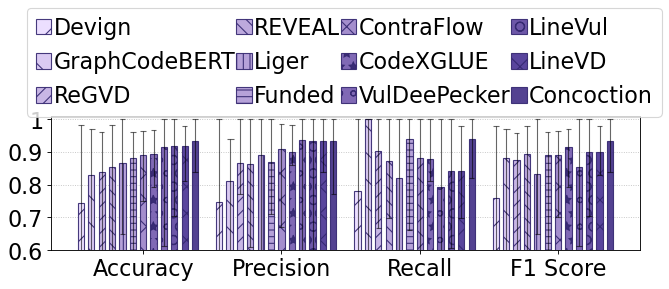

This figure reports the "higher-is-better" metrics achieved by Concoction and the baseline methods on the SARD dataset. The min-max bar indicates variances across cross-validation runs. Concoction outperforms baseline methods in all metrics and demonstrates the most reliable performance across cross-validation runs, with the narrowest min-max bar.
---------------------------------------------------------------------------------------------------------



In [7]:
%matplotlib inline
from Evaluation.demo2.chart.chart import *
from Evaluation.demo2.demo2AllSard import *
# Output Figure 7: Evaluation on standard vulnerability databases. Min-max bars show performance across vulnerability types.

print("Evaluating all 12 SOTA methods on entire SARD dataset... (approximately 10 mins)")
# !python /homee/Evaluation/demo2/demo2AllSard.py --sard True > /homee/Evaluation/demo2/allSardResult.log
!python /homee/Evaluation/demo2/demo2AllSard.py --sard True
# print("Saving results in allSardResult.log ...")

print("Output Figure 7: Evaluation on standard vulnerability databases. Min-max bars show performance across vulnerability types.")
drawSard()
print("This figure reports the \"higher-is-better\" metrics achieved by Concoction and the baseline methods on the SARD dataset. The min-max bar indicates variances across cross-validation runs. Concoction outperforms baseline methods in all metrics and demonstrates the most reliable performance across cross-validation runs, with the narrowest min-max bar.")
print("---------------------------------------------------------------------------------------------------------\n")

============================funded=================================
Loading the dataset... 
Loading the trained model...

The detection result is : Accuracy: 0.727  Precision: 0.679  Recall: 0.864  F1 Score: 0.76
============================devign=================================
Loading the dataset... 
Loading the trained model...

The detection result is : Accuracy: 0.63  Precision: 0.67  Recall: 0.58  F1 Score: 0.62
============================reveal=================================
Loading the dataset... 
Loading the trained model...
The detection result is : Accuracy: 0.6711  Precision: 0.6951  Recall: 0.6569  F1 Score: 0.6755
============================vuldeepecker=================================
Loading the dataset... 
Loading the trained model...

The detection result is: Accuracy: 0.6086 Precision: 0.6337 Recall: 0.5956 F1 Score: 0.6141
============================concoction=================================
Loading the dataset... 
Loading the trained model...

The detection 

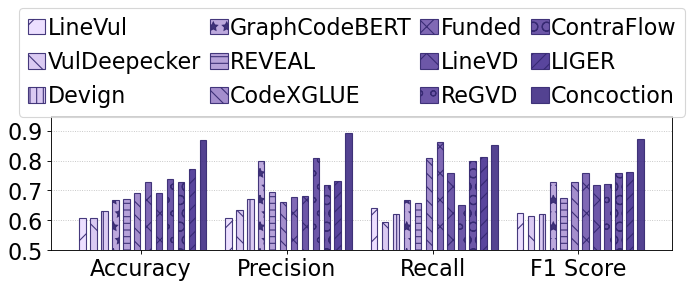

Test samples in the CVE dataset are more complex than the SARD dataset. As such, it is more challenging to achieve good performance. However, Concoction outperforms all other methods across all evaluation metrics shown as this Figure.


In [8]:
%matplotlib inline
from Evaluation.demo2.chart.chart import *
from Evaluation.demo2.demo2AllGithub import *
# Output Figure 8:  Evaluation on the CVE dataset Concoction gives the best performance across evaluation metrics.

print("Evaluating all 12 SOTA methods on entire CVE dataset... (approximately 10 mins)")
# !python /homee/Evaluation/demo2/demo2AllGithub.py > /homee/Evaluation/demo2/allGithubResult.log
!python /homee/Evaluation/demo2/demo2AllGithub.py
# print("Saving results in allGithubResult.log ...")

print("\n Output Figure 8:  Evaluation on the CVE dataset Concoction gives the best performance across evaluation metrics.")
drawGithub()
print("Test samples in the CVE dataset are more complex than the SARD dataset. As such, it is more challenging to achieve good performance. However, Concoction outperforms all other methods across all evaluation metrics shown as this Figure.")


### Case Study 3:  Evaluation on Opensource Projects (Section 5.3)

We now compare to the baseline methods by applying them to the three open-source projects in Table 2 with a total of 35 CVEs reported by independent users.

This demo corresponds to Table 5 of the submitted manuscript.

*approximate runtime = 10 minutes for one benchmark*

#### --model:
This parameter defines 12 candidate vulnerability detection methods. Possible values are:

"concoction" ,"funded"[1], "vuldeepecker"[2], "reveal"[3], "devign"[4], "ReGVD"[5], "LineVul"[6], "Linevd"[7], "codebert"[8], "graphCodebert"[9], "ContraFlow"[10],"Liger" [11] 


In [9]:
from Evaluation.demo2.demo2CVE import *

print("-------------------Evaluating the \"codebert\" approach on 35 CVEs:--------------------------------------")
EvaluationOP(model="codebert").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("-------------------Evaluating the \"devign\" approach on 35 CVEs:----------------------------------------")
EvaluationOP(model="devign").run()
print("---------------------------------------------------------------------------------------------------------\n")


print("-------------------Evaluating the \"regvd\" approach on 35 CVEs:-----------------------------------------")
EvaluationOP(model="regvd").run()
print("---------------------------------------------------------------------------------------------------------\n")


print("-------------------Evaluating the \"funded\" approach on 35 CVEs:----------------------------------------")
EvaluationOP(model="funded").run()
print("---------------------------------------------------------------------------------------------------------\n")


print("-------------------Evaluating the \"reveal\" approach on 35 CVEs:----------------------------------------")
EvaluationOP(model="reveal").run()
print("---------------------------------------------------------------------------------------------------------\n")


print("-------------------Evaluating the \"Linevd\" approach on 35 CVEs:----------------------------------------")
EvaluationOP(model="Linevd").run()
print("---------------------------------------------------------------------------------------------------------\n")


print("------------------Evaluating the \"vuldeepecker\" approach on 35 CVEs:-----------------------------------")
EvaluationOP(model="vuldeepecker").run()
print("---------------------------------------------------------------------------------------------------------\n")


print("------------------Evaluating the \"ContraFlow\" approach on 35 CVEs:-------------------------------------")
EvaluationOP(model="ContraFlow").run()
print("---------------------------------------------------------------------------------------------------------\n")


print("------------------Evaluating the \"Liger\" approach on 35 CVEs:------------------------------------------")
EvaluationOP(model="Liger").run()
print("---------------------------------------------------------------------------------------------------------\n")


print("------------------Evaluating the \"Concoction\" approach on 35 CVEs:-------------------------------------")
EvaluationOP(model="concoction").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("------------------Evaluating the \"LineVul\" approach on 35 CVEs:----------------------------------------")
EvaluationOP(model="LineVul").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("-------------------Evaluating the \"graphCodebert\" approach on 35 CVEs:---------------------------------")
EvaluationOP(model="graphCodebert").run()
print("---------------------------------------------------------------------------------------------------------\n")

print("Finished")

-------------------Evaluating the "codebert" approach on 35 CVEs:--------------------------------------
Loading codebert pretrained model...
Detecting vulnerabilities on all projects...
3/35 vulnerabilities were detected: "multiply_ms"、"renameUnmapSelectCb" and "sqlite3ExprCodeTarget"
---------------------------------------------------------------------------------------------------------

-------------------Evaluating the "devign" approach on 35 CVEs:----------------------------------------
Loading Devign pretrained model...
Detecting vulnerabilities on all projects...
1/35 vulnerabilitie was detected: "multiSelectOrderBy"
---------------------------------------------------------------------------------------------------------

-------------------Evaluating the "regvd" approach on 35 CVEs:-----------------------------------------
Loading reGVD pretrained model...
Detecting vulnerabilities on all projects...

2/35 vulnerabilities were detected: "JBIGDecode" and "exprListAppendList"
---

#### Full-scale evaluation data
We now generate the table using full-scale evaluation data (it would take too long to run the experiment lively). The results correspond to Figure Table 5 (Section 5.3) of the submitted manuscript.

In [10]:
# Output Table 5: The number of vulnerabilities identified Concoction and other methods for open-source projects in Table 3.
print("Output Table 5: The number of vulnerabilities identified Concoction and other methods for 3 open-source projects:\n")

from Evaluation.demo2.table.test import draw
draw()
print("---------------------------------------------------------------------------------------------------------")
print("We compare Concoction to the baselines on three open-source projects. These projects contain 35 CVEs reported by independent users. This Table demonstrates Concoction’s advantages over other methods in identifying vulnerabilities across the three open-source projects evaluated.")

Output Table 5: The number of vulnerabilities identified Concoction and other methods for 3 open-source projects:

Categories                           Approaches       #vuln
-----------------------------------  -------------  -------
                                     Infer                2
                                     CodeQL               3
All static analysis tools                                 5
                                     KLEE                 2
                                     MoKLEE               4
Symbolic execution engines                                6
Fuzzing tool                         AFL++                8
                                     Vuldeepecker         1
                                     Funded               2
                                     Devign               1
                                     ReVeal               2
                                     ReGVD                2
                                     LineVul 

### Ablation Study (Section 5.4)

we evaluate seven variants of Concoction on the CVE dataset.

This demo corresponds to Figure 9 of the submitted manuscript.

*approximate runtime = 10 minutes for one benchmark*

#### --mode:
This parameter defines 7 candidate variants of Concoction. Possible values are:

"nonDynamic","nonStatic","nonCL","nonSel","concoction_MS","concoction_IT","concoction"

In [11]:
#We conduct an ablation study on Concoction using the CVE dataset.
# The study includes the following variants:nonDynamic,nonStatic,nonCL,nonSel,concoction_MS,concoction_IT,concoction
from Evaluation.ablation.concoction import Concoction
conco=Concoction()

print("We conduct an ablation study  on Concoction using the CVE dataset with different variants:\n")

print("nonDynamic (using enhanced AST, Sec 3.2.1):")
print("---------------------------------------------------------------------------------------------------------")
conco.run(mode="nonDynamic")
print("---------------------------------------------------------------------------------------------------------\n")

print("nonStatic (utilizing randomly sampled symbolic traces with 30 minutes of symbolic execution for each project, Sec.3.2.2)")
print("---------------------------------------------------------------------------------------------------------")
conco.run(mode="nonStatic")
print("---------------------------------------------------------------------------------------------------------\n")

print("NonCL (without the contrastive learning module, Sec.3.3)")
print("---------------------------------------------------------------------------------------------------------")
conco.run(mode="nonCL")
print("---------------------------------------------------------------------------------------------------------\n")

print("NonSel (omitting the path selection module by using randomly sampled symbolic execution traces with static code information, Sec 3.4)")
print("---------------------------------------------------------------------------------------------------------")
conco.run(mode="nonSel")
print("---------------------------------------------------------------------------------------------------------\n")

print("Concoction-MisSam (introduce mislabeled samples of the training samples into the training dataset of Concoction)")
print("---------------------------------------------------------------------------------------------------------")
conco.run(mode="concoction_MS")
print("---------------------------------------------------------------------------------------------------------\n")

print("Concoction-IT (randomly remove some symbolic execution traces selected by Concoction)")
print("---------------------------------------------------------------------------------------------------------")
conco.run(mode="concoction_IT")
print("---------------------------------------------------------------------------------------------------------\n")

print("Conc (representing the complete Concoction implementation).")
print("---------------------------------------------------------------------------------------------------------")
conco.run(mode="concoction")
print("---------------------------------------------------------------------------------------------------------\n")
print("Finished")

We conduct an ablation study  on Concoction using the CVE dataset with different variants:

nonDynamic (using enhanced AST, Sec 3.2.1):
---------------------------------------------------------------------------------------------------------
Loading the nonDynamic model..
Computed data embeddings
The evaluation results is:
Accuracy: 0.7030  Precision: 0.6870  Recall: 0.6870  F1 Score: 0.6870

---------------------------------------------------------------------------------------------------------

nonStatic (utilizing randomly sampled symbolic traces with 30 minutes of symbolic execution for each project, Sec.3.2.2)
---------------------------------------------------------------------------------------------------------
Loading the NonStatic model..
Computed data embeddings
The evaluation results is:
Accuracy: 0.7530  Precision: 0.7540  Recall: 0.7920  F1 Score: 0.7725

---------------------------------------------------------------------------------------------------------

NonCL (wit

#### Full-scale evaluation data
We now generate the figure using full-scale evaluation data (the full-scale evaluation would take too long to run the experiment lively in provided docker). The results correspond to Figure 9 (Section 5.4) of the submitted manuscript.


Output Figure 9:  Comparing implementation variants of Concoction on the CVE dataset.


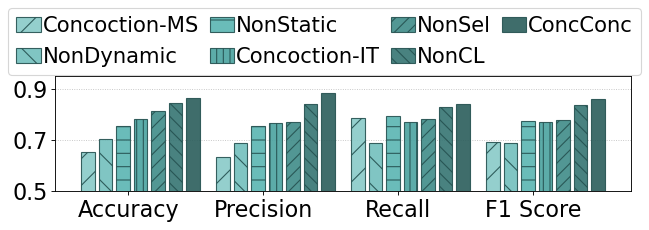

The results are given in above Figure, evaluating different variants to Concoction.


In [12]:
from Evaluation.demo2.chart.ablation import graphEM

print("Output Figure 9:  Comparing implementation variants of Concoction on the CVE dataset.")
graphEM()
print("The results are given in above Figure, evaluating different variants to Concoction.")

# ***Reference***

| Source code                                                  | Title                                                        | Authors                                                   |
| :----------------------------------------------------------- | :----------------------------------------------------------- | :-------------------------------------------------------- |
| [Funded](https://github.com/HuantWang/FUNDED_NISL)[1]        | Combining Graph-Based Learning With Automated Data Collection for Code Vulnerability Detection | H. Wang, G. Ye, Z. Tang, et al.                           |
| [Vuldeepecker](https://github.com/CGCL-codes/VulDeePecker)[2] | VulDeePecker: A Deep Learning-Based System for Vulnerability Detection | Zhen Li, Deqing Zou, Shouhuai Xu, et al.                  |
| [ReVeal](https://github.com/VulDetProject/ReVeal)[3]         | Deep learning based vulnerability detection: Are we there yet | Saikat Chakraborty, Rahul Krishna, Yangruibo Ding, et al. |
| [Devign](https://github.com/epicosy/devign)[4]               | Devign: Effective vulnerability identification by learning comprehensive program semantics via graph neural networks | Yaqin Zhou, Shangqing Liu, Jingkai Siow, et al.           |
| [ReGVD](https://github.com/daiquocnguyen/GNN-ReGVD)[5]       | ReGVD: Revisiting Graph Neural Networks for Vulnerability Detection | Van-Anh Nguyen, Dai Quoc Nguyen, Van Nguyen, et al.       |
| [LineVul](https://github.com/awsm-research/LineVul)[6]       | Linevul: A transformer-based line-level vulnerability prediction | Michael Fu and Chakkrit Tantithamthavorn.                 |
| [LineVD](https://github.com/davidhin/linevd)[7]              | LineVD: Statement-level vulnerability detection using graph neural networks | David Hin, Andrey Kan, Huaming Chen, et al.               |
| [CodeXGLUE](https://github.com/microsoft/CodeXGLUE)[8]       | CodeXGLUE: A Machine Learning Benchmark Dataset for Code Understanding and Generation | Shuai Lu, Daya Guo, Shuo Ren, et al.                      |
| [GraphcodeBERT](https://github.com/microsoft/CodeBERT/tree/master/GraphCodeBERT)[9] | GraphCodeBERT: Pre-training Code Representations with Data Flow | Daya Guo, Shuo Ren, Shuai Lu, et al.                      |
| [Contraflow](https://dl.acm.org/doi/10.1145/3533767.3534371)[10] | Path-Sensitive Code Embedding via Contrastive Learning for Software Vulnerability Detection | Xiao Cheng, Guanqin Zhang, Haoyu Wang, et al.             |
| [LIGER](https://github.com/keowang/dynamic-program-embedding)[11] | Blended, Precise Semantic Program Embeddings                 | Ke Wang and Zhendong Su.                                  |
| [CodeQL](https://github.com/github/codeql)[12]               | CodeQL, discover vulnerabilities with semantic code analysis engine | /                                                         |
| [Infer](https://github.com/facebook/infer)[13]               | Infer, a static program analyzer                             | /                                                         |
| [KLEE](https://klee.github.io/)[14]                          | Klee: unassisted and automatic generation of high-coverage tests for complex systems programs | Cristian Cadar, Daniel Dunbar, Dawson R Engler, et al.    |
| [MoKLEE](https://srg.doc.ic.ac.uk/projects/moklee/)[15]      | Running symbolic execution forever                           | Frank Busse, Martin Nowack, and Cristian Cadar.           |
| [AFL++](https://github.com/AFLplusplus/AFLplusplus)[16]      | AFL++:Combining Incremental Steps of Fuzzing Research        | Andrea Fioraldi, Dominik Maier, Heiko Eißfeldt, et al.    |